In [33]:
import pandas as pd  # for data hadling
import numpy as np  # for data handling
import matplotlib.pyplot as plt # visualization
%matplotlib inline
import seaborn as sns  # visualization
from patsy import dmatrices
import sklearn
from datetime import datetime



In [40]:
# Read the Data from Source into a dataframe

walmart_data = pd.read_csv('Walmart_Store_sales.csv')

In [41]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

/tmp/ipykernel_69/369295441.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])


In [37]:
# Top five rows
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [17]:
walmart_data.min()

Store                    1
Date            01-04-2011
Weekly_Sales     209986.25
Holiday_Flag             0
Temperature          -2.06
Fuel_Price           2.472
CPI                126.064
Unemployment         3.879
dtype: object

In [ ]:
#Basic Statistics tasks
Which store has maximum sales
Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
Which store/s has good quarterly growth rate in Q3’2012
Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
Provide a monthly and semester view of sales in units and give insights



In [ ]:
# Which store has maximum sales:

In [30]:
walmart_data_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales. Sum of Total Sales {}".format(walmart_data_sales.idxmax
(),walmart_data_sales.max()))

Store Number 20 has maximum Sales. Sum of Total Sales 301397792.46


In [ ]:
# Which store has minimum sales:

In [32]:
walmart_data_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has minimum Sales. Sum of Total Sales {}".format(walmart_data_sales.idxmin
(),walmart_data_sales.min()))

Store Number 33 has minimum Sales. Sum of Total Sales 37160221.96


In [ ]:
# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

In [33]:
walmart_data_std = walmart_data.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation. STD {}".format(walmart_data_std['Weekly_Sales'].idxmax(),walmart_data_std['Weekly_Sales'].max()))

Store Number 14 has maximum Standard Deviation. STD 317569.9494755081


In [42]:
walmart_data_std_coeff = walmart_data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
walmart_data_std_coeff

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881
9      5.439806e+05   69028.666585
10     1.899425e+06  302262.062504
11     1.356383e+06  165833.887863
12     1.009002e+06  139166.871880
13     2.003620e+06  265506.995776
14     2.020978e+06  317569.949476
15     6.233125e+05  120538.652043
16     5.192477e+05   85769.680133
17     8.935814e+05  112162.936087
18     1.084718e+06  176641.510839
19     1.444999e+06  191722.638730
20     2.107677e+06  275900.562742
21     7.560691e+05  128752.812853
22     1.028501e+06  161251.350631
23     1.389864e+06  249788.038068
24     1.356755e+06  167745.677567
25     7.067215e+05  112976.788600
26     1.002912e+06  110431.288141
27     1.775216e+06  239930.135688
28     1.323522e+06  181758.967539
29     5.394514e+05   99120.136596
30     4.385796e+05   22809.665590
31     1.395901e+06  125855.942933
32     1.166568e+06  138017.252087
33     2.598617e+05   24132.927322
34     9.667816e+05  104630.164676
35     9.197250e+05  211243.457791
36     3.735120e+05   60725.173579
37     5.189003e+05   21837.461190
38     3.857317e+05   42768.169450
39     1.450668e+06  217466.454833
40     9.641280e+05  119002.112858
41     1.268125e+06  187907.162766
42     5.564039e+05   50262.925530
43     6.333247e+05   40598.413260
44     3.027489e+05   24762.832015
45     7.859814e+05  130168.526635

In [44]:


# Convert the 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

# Filter the data for Q3'2012 (July to September)
Q3_data = walmart_data[(walmart_data['Date'] >= '2012-07-01') & (walmart_data['Date'] <= '2012-09-30')]

# Calculate the quarterly growth rate for each store
Q3_growth = Q3_data.groupby('Store')['Weekly_Sales'].sum()

# Find the store with the highest growth rate in Q3'2012
best_store = Q3_growth.idxmax()
highest_growth = Q3_growth.max()

print(f"Store with the highest growth rate in Q3'2012 is Store {best_store} with growth rate: {highest_growth:.2f}")


Store with the highest growth rate in Q3'2012 is Store 4 with growth rate: 25652119.35


In [ ]:
# non_holiday_sales 

non_holiday_sales = walmart_data[~walmart_data['Date'].isin(holiday_sales)]['Weekly_Sales'].mean()

In [3]:
print(" The non-holidays sales mean of all stores amounts to",1046964.8775617715,end="$")

 The non-holidays sales mean of all stores amounts to 1046964.8775617715$

In [31]:
# Stores Holiday Sales
stores_holiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 1]

In [32]:
# Stores Weekday Sales
stores_nonholiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 0]


In [ ]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y') 
# Define the holiday dates
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']
labor_day_dates = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']

# Calculate total sales for each holiday
holiday_sales = {}
for holiday_date in super_bowl_dates:
    holiday_sales['Super Bowl ' + holiday_date] = walmart_data[walmart_data['Date'] == holiday_date]['Weekly_Sales'].sum()

for holiday_date in labor_day_dates:
    holiday_sales['Labor Day ' + holiday_date] = walmart_data[walmart_data['Date'] == holiday_date]['Weekly_Sales'].sum()

for holiday_date in thanksgiving_dates:
    holiday_sales['Thanksgiving ' + holiday_date] = walmart_data[walmart_data['Date'] == holiday_date]['Weekly_Sales'].sum()

for holiday_date in christmas_dates:
    holiday_sales['Christmas ' + holiday_date] = walmart_data[walmart_data['Date'] == holiday_date]['Weekly_Sales'].sum()

# Calculate non-holiday sales mean
non_holiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Calculate the total holiday sales
total_super_bowl_sales = sum(holiday_sales.get('Super Bowl ' + date, 0) for date in super_bowl_dates)
total_labor_day_sales = sum(holiday_sales.get('Labor Day ' + date, 0) for date in labor_day_dates)
total_thanksgiving_sales = sum(holiday_sales.get('Thanksgiving ' + date, 0) for date in thanksgiving_dates)
total_christmas_sales = sum(holiday_sales.get('Christmas ' + date, 0) for date in christmas_dates)

# Compare the total holiday sales with non-holiday sales mean
if total_super_bowl_sales > non_holiday_sales:
    print(f"Total Super Bowl Sales: ${total_super_bowl_sales:.2f} is higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")
else:
    print(f"Total Super Bowl Sales: ${total_super_bowl_sales:.2f} is not higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")

if total_labor_day_sales > non_holiday_sales:
    print(f"Total Labor Day Sales: ${total_labor_day_sales:.2f} is higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")
else:
    print(f"Total Labor Day Sales: ${total_labor_day_sales:.2f} is not higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")

if total_thanksgiving_sales > non_holiday_sales:
    print(f"Total Thanksgiving Sales: ${total_thanksgiving_sales:.2f} is higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")
else:
    print(f"Total Thanksgiving Sales: ${total_thanksgiving_sales:.2f} is not higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")

if total_christmas_sales > non_holiday_sales:
    print(f"Total Christmas Sales: ${total_christmas_sales:.2f} is higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")
else:
    print(f"Total Christmas Sales: ${total_christmas_sales:.2f} is not higher than the mean non-holiday sales of ${non_holiday_sales:.2f}")


Total Super Bowl Sales: $145682278.34 is higher than the mean non-holiday sales of $1041256.38
Total Labor Day Sales: $140727684.68 is higher than the mean non-holiday sales of $1041256.38
Total Thanksgiving Sales: $132414608.50 is higher than the mean non-holiday sales of $1041256.38
Total Christmas Sales: $86474980.04 is higher than the mean non-holiday sales of $1041256.38


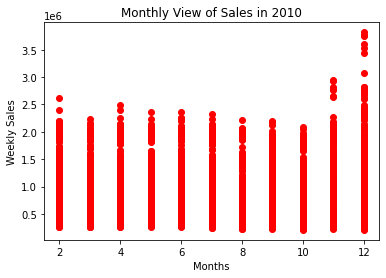

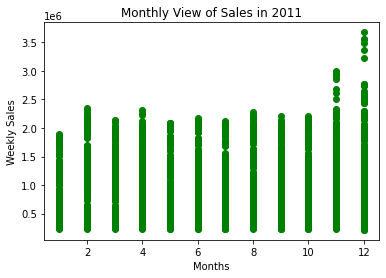

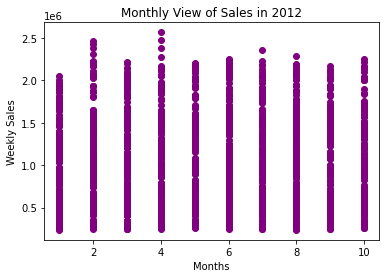

In [ ]:
# Monthly view of sales for each year
plt.scatter(walmart_data[walmart_data.Year == 2010]["Month"], walmart_data[walmart_data.Year == 2010]["Weekly_Sales"], color='red')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly View of Sales in 2010")
plt.show()

plt.scatter(walmart_data[walmart_data.Year == 2011]["Month"], walmart_data[walmart_data.Year == 2011]["Weekly_Sales"], color='green')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly View of Sales in 2011")
plt.show()

plt.scatter(walmart_data[walmart_data.Year == 2012]["Month"], walmart_data[walmart_data.Year == 2012]["Weekly_Sales"], color='purple')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly View of Sales in 2012")
plt.show()


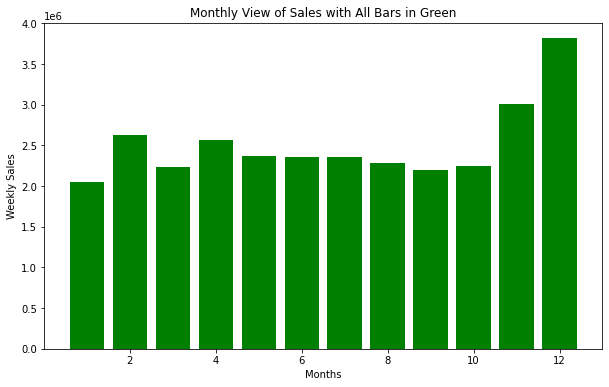

In [ ]:
import matplotlib.pyplot as plt

# Monthly view of sales for all years with all bars in green
plt.figure(figsize=(10, 6))
plt.bar(walmart_data["Month"], walmart_data["Weekly_Sales"], color='green')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly View of Sales with All Bars in Green")
plt.show()


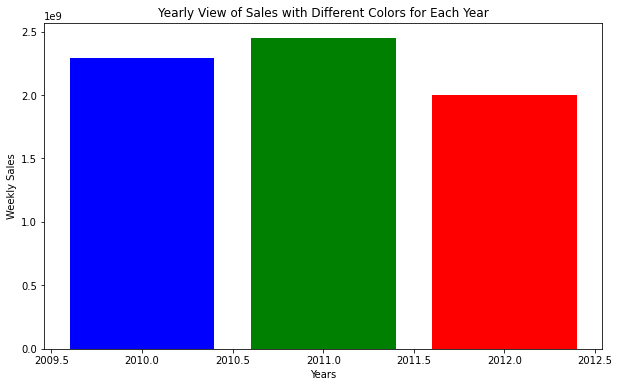

In [28]:
import matplotlib.pyplot as plt

# Yearly view of sales with different colors for each year
plt.figure(figsize=(10, 6))
yearly_sales = walmart_data.groupby("Year")[["Weekly_Sales"]].sum()

# Define a list of unique colors for each year
colors = ['blue', 'green', 'red']

# Create a bar chart with different colors
for i, year in enumerate(yearly_sales.index):
    plt.bar(year, yearly_sales.loc[year, "Weekly_Sales"], color=colors[i])

plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly View of Sales with Different Colors for Each Year")
plt.show()


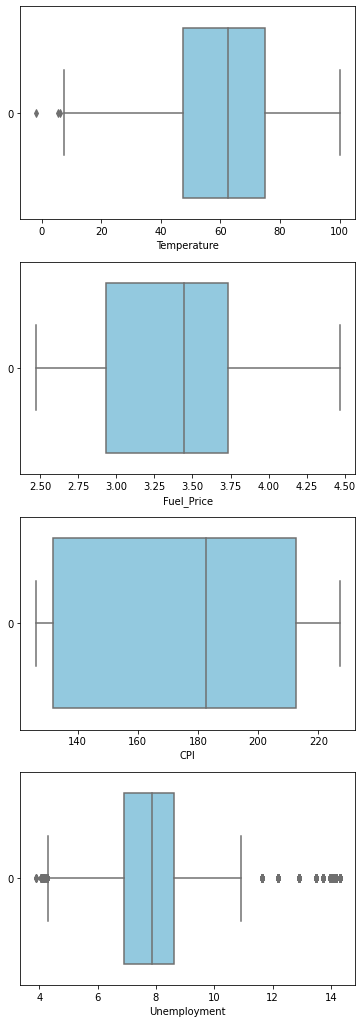

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for boxplots
fig, axs = plt.subplots(4, figsize=(6, 18))

# List of columns to analyze
columns_to_analyze = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create boxplots for each column
for i, column in enumerate(columns_to_analyze):
    sns.boxplot(walmart_data[column], ax=axs[i], orient='h', color='skyblue')
    axs[i].set_xlabel(column)  # Set the x-axis label for each subplot

plt.show()


In [9]:
# Format DataFrame to remove outliers
walmart_data_new = walmart_data.loc[
    (walmart_data['Unemployment'] >= 4.5) & (walmart_data['Unemployment'] <= 10) &
    (walmart_data['Temperature'] > 10)
]

# Display the filtered DataFrame
walmart_data_new


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


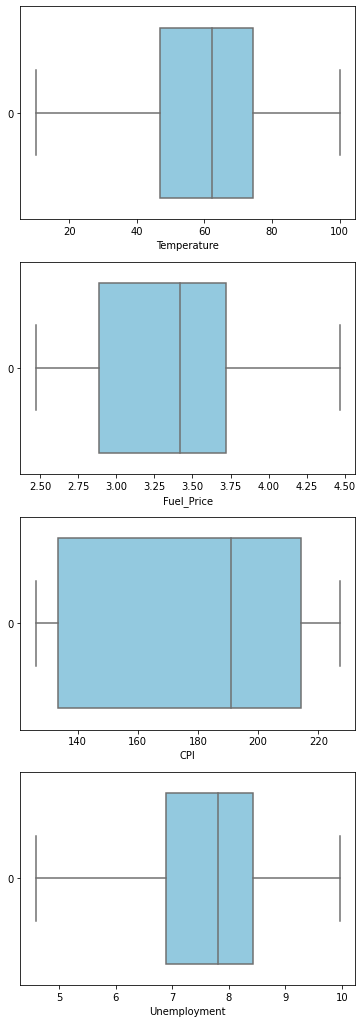

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for boxplots
fig, axs = plt.subplots(4, figsize=(6, 18))

# List of columns to analyze
columns_to_analyze = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create boxplots for each column in 'walmart_data'
X = walmart_data_new[columns_to_analyze]
for i, column in enumerate(X):
    sns.boxplot(X[column], ax=axs[i], orient='h', color='skyblue')
    axs[i].set_xlabel(column)  # Set the x-axis label for each subplot

plt.show()


In [16]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
# Build Model

Random Forest Regressor:

Accuracy: 94.37298247904533
Mean Absolute Error: 75699.15892412013
Mean Squared Error: 18647639415.610523
Root Mean Squared Error: 136556.35985046806


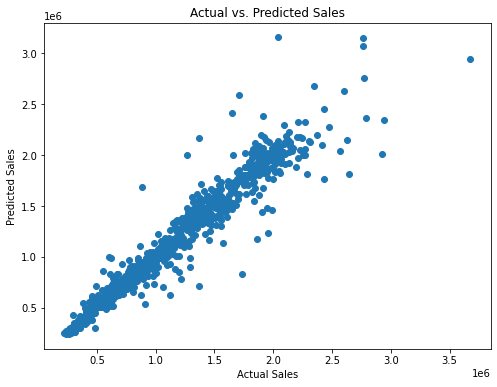

In [24]:
# Select features and target
X = walmart_data_new[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']]
y = walmart_data_new['Weekly_Sales']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators=400, max_depth=15, n_jobs=5)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Accuracy:', rfr.score(X_test, y_test) * 100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import matplotlib.pyplot as plt

# Scatterplot to visualize the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


